In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.
Необхідно побудувати регресійну модель на одному з вбудованих датасетів, доступних у
бібліотеці scikit-learn. Основна мета завдання — навчитися побудові регресійних
моделей та уникненню перенавчання (overfitting) шляхом застосування відповідних
технік.


In [123]:
from google.colab import files
import pandas as pd
# Завантаження файлу
uploaded = files.upload()

df = pd.read_csv('breast_cancer.csv')
df

Saving breast_cancer.csv to breast_cancer (1).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Завантажте дані та розділіть їх на навчальну та тестову вибірки
(рекомендується використовувати співвідношення 80/20 або 70/30).

In [135]:

from sklearn.model_selection import train_test_split

df = pd.read_csv('breast_cancer.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (398, 3)
X_test: (171, 3)
y_train: (398,)
y_test: (171,)


Побудуйте базову лінійну регресійну модель на основі навчальної вибірки.
o Оцініть точність моделі на тестовій вибірці та визначте її продуктивність,
використовуючи метрики якості регресії (наприклад, mean_squared_error,
R^2).

In [136]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('breast_cancer.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.0938
RMSE: 0.3063
R²: 0.5995


Перевірте наявність перенавчання, порівнюючи результати на навчальній та
тестовій вибірках. Якщо модель показує значно кращі результати на
навчальних даних, це може свідчити про перенавчання.

In [137]:

df = pd.read_csv('breast_cancer.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== НАВЧАЛЬНА ВИБІРКА ===")
print(f"MSE: {train_mse:.4f}")
print(f"R2: {train_r2:.4f}")

print("\n=== ТЕСТОВА ВИБІРКА ===")
print(f"MSE: {test_mse:.4f}")
print(f"R2: {test_r2:.4f}")

print("\n=== ПЕРЕВІРКА ПЕРЕНАВЧАННЯ ===")
mse_ratio = train_mse / test_mse
r2_diff = train_r2 - test_r2

print(f"Відношення MSE (train/test): {mse_ratio:.4f}")
print(f"Різниця R2 (train-test): {r2_diff:.4f}")

if mse_ratio < 0.7 or r2_diff > 0.1:
    print("Можливе перенавчання")
elif mse_ratio > 1.3 or r2_diff < -0.1:
    print("Можливе недонавчання")
else:
    print("Модель узагальнюється добре")

=== НАВЧАЛЬНА ВИБІРКА ===
MSE: 0.0793
R2: 0.6606

=== ТЕСТОВА ВИБІРКА ===
MSE: 0.0938
R2: 0.5995

=== ПЕРЕВІРКА ПЕРЕНАВЧАННЯ ===
Відношення MSE (train/test): 0.8452
Різниця R2 (train-test): 0.0611
Модель узагальнюється добре


Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge
Regression або Lasso Regression.
o Перевірте роботу моделі з різними значеннями параметра регуляризації та
виберіть оптимальне значення.
o Застосуйте крос-валідацію для більш стабільної оцінки продуктивності
моделі.

In [140]:


df = pd.read_csv('breast_cancer.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')

ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)

best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

ridge_pred = best_ridge.predict(X_test_scaled)
lasso_pred = best_lasso.predict(X_test_scaled)

ridge_cv_scores = cross_val_score(best_ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(best_lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print("=== RIDGE REGRESSION ===")
print(f"Найкращий alpha: {ridge_cv.best_params_['alpha']}")
print(f"Test MSE: {mean_squared_error(y_test, ridge_pred):.4f}")
print(f"Test R2: {r2_score(y_test, ridge_pred):.4f}")
print(f"Крос-валідація MSE: {-ridge_cv_scores.mean():.4f} (+/- {ridge_cv_scores.std() * 2:.4f})")

print("\n=== LASSO REGRESSION ===")
print(f"Найкращий alpha: {lasso_cv.best_params_['alpha']}")
print(f"Test MSE: {mean_squared_error(y_test, lasso_pred):.4f}")
print(f"Test R2: {r2_score(y_test, lasso_pred):.4f}")
print(f"Крос-валідація MSE: {-lasso_cv_scores.mean():.4f} (+/- {lasso_cv_scores.std() * 2:.4f})")

print(f"\nКількість ненульових коефіцієнтів у Lasso: {np.sum(best_lasso.coef_ != 0)}")

=== RIDGE REGRESSION ===
Найкращий alpha: 1
Test MSE: 0.0939
Test R2: 0.5992
Крос-валідація MSE: 0.0813 (+/- 0.0124)

=== LASSO REGRESSION ===
Найкращий alpha: 0.001
Test MSE: 0.0939
Test R2: 0.5991
Крос-валідація MSE: 0.0813 (+/- 0.0127)

Кількість ненульових коефіцієнтів у Lasso: 3


Оцініть кінцеву продуктивність моделі на тестовій вибірці та порівняйте її з
базовою моделлю.
o Проаналізуйте, як введення регуляризації та використання крос-валідації
вплинули на якість моделі.

In [141]:


df = pd.read_csv('breast_cancer.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_model = LinearRegression()
base_model.fit(X_train_scaled, y_train)
base_pred = base_model.predict(X_test_scaled)

ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')

ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)

best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

ridge_pred = best_ridge.predict(X_test_scaled)
lasso_pred = best_lasso.predict(X_test_scaled)

print("=== ПОРІВНЯННЯ МОДЕЛЕЙ ===")
print("\n--- БАЗОВА ЛІНІЙНА РЕГРЕСІЯ ---")
print(f"MSE: {mean_squared_error(y_test, base_pred):.4f}")
print(f"R2: {r2_score(y_test, base_pred):.4f}")

print("\n--- RIDGE РЕГРЕСІЯ ---")
print(f"Найкращий alpha: {ridge_cv.best_params_['alpha']}")
print(f"MSE: {mean_squared_error(y_test, ridge_pred):.4f}")
print(f"R2: {r2_score(y_test, ridge_pred):.4f}")

print("\n--- LASSO РЕГРЕСІЯ ---")
print(f"Найкращий alpha: {lasso_cv.best_params_['alpha']}")
print(f"MSE: {mean_squared_error(y_test, lasso_pred):.4f}")
print(f"R2: {r2_score(y_test, lasso_pred):.4f}")

print("\n=== АНАЛІЗ ВПЛИВУ РЕГУЛЯРИЗАЦІЇ ===")
ridge_mse_improvement = ((mean_squared_error(y_test, base_pred) - mean_squared_error(y_test, ridge_pred)) /
                       mean_squared_error(y_test, base_pred)) * 100
lasso_mse_improvement = ((mean_squared_error(y_test, base_pred) - mean_squared_error(y_test, lasso_pred)) /
                        mean_squared_error(y_test, base_pred)) * 100

print(f"Покращення MSE Ridge vs Базова: {ridge_mse_improvement:+.2f}%")
print(f"Покращення MSE Lasso vs Базова: {lasso_mse_improvement:+.2f}%")

print(f"\nКількість ненульових коефіцієнтів:")
print(f"Базова модель: {len(base_model.coef_)}")
print(f"Lasso модель: {np.sum(best_lasso.coef_ != 0)}")

print("\n=== СТАБІЛЬНІСТЬ МОДЕЛЕЙ (КРОС-ВАЛІДАЦІЯ) ===")
base_cv_scores = cross_val_score(base_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_cv_scores = cross_val_score(best_ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(best_lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Базова модель CV MSE: {-base_cv_scores.mean():.4f} (+/- {base_cv_scores.std() * 2:.4f})")
print(f"Ridge модель CV MSE: {-ridge_cv_scores.mean():.4f} (+/- {ridge_cv_scores.std() * 2:.4f})")
print(f"Lasso модель CV MSE: {-lasso_cv_scores.mean():.4f} (+/- {lasso_cv_scores.std() * 2:.4f})")

=== ПОРІВНЯННЯ МОДЕЛЕЙ ===

--- БАЗОВА ЛІНІЙНА РЕГРЕСІЯ ---
MSE: 0.0938
R2: 0.5995

--- RIDGE РЕГРЕСІЯ ---
Найкращий alpha: 1
MSE: 0.0939
R2: 0.5992

--- LASSO РЕГРЕСІЯ ---
Найкращий alpha: 0.001
MSE: 0.0939
R2: 0.5991

=== АНАЛІЗ ВПЛИВУ РЕГУЛЯРИЗАЦІЇ ===
Покращення MSE Ridge vs Базова: -0.07%
Покращення MSE Lasso vs Базова: -0.11%

Кількість ненульових коефіцієнтів:
Базова модель: 3
Lasso модель: 3

=== СТАБІЛЬНІСТЬ МОДЕЛЕЙ (КРОС-ВАЛІДАЦІЯ) ===
Базова модель CV MSE: 0.0813 (+/- 0.0125)
Ridge модель CV MSE: 0.0813 (+/- 0.0124)
Lasso модель CV MSE: 0.0813 (+/- 0.0127)


Побудуйте графіки, що демонструють залежність помилки моделі від
гіперпараметрів регуляризації.
o Підготуйте звіт з висновками щодо ефективності моделі, заходів щодо
запобігання перенавчанню та загальних результатів.

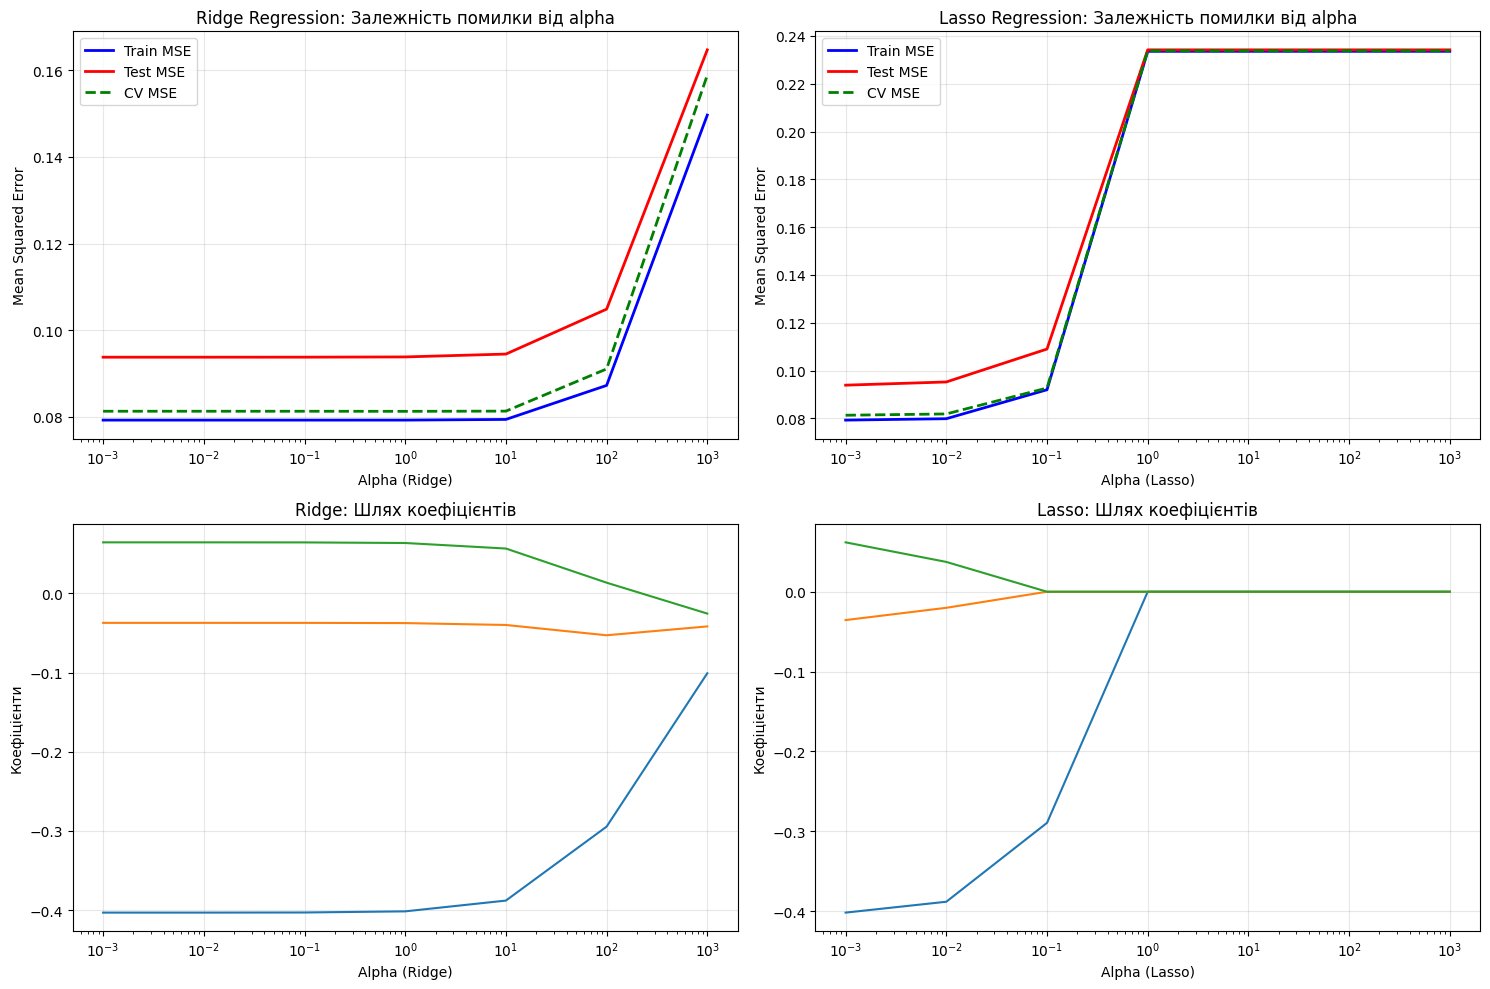

=== ОПТИМАЛЬНІ ПАРАМЕТРИ ===
Найкращий alpha для Ridge (за Test MSE): 0.001
Найкращий alpha для Lasso (за Test MSE): 0.001
Мінімальна Test MSE Ridge: 0.0938
Мінімальна Test MSE Lasso: 0.0939


In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('breast_cancer.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

ridge_train_errors = []
ridge_test_errors = []
ridge_cv_errors = []

lasso_train_errors = []
lasso_test_errors = []
lasso_cv_errors = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    ridge_train_pred = ridge.predict(X_train_scaled)
    ridge_test_pred = ridge.predict(X_test_scaled)

    ridge_train_errors.append(mean_squared_error(y_train, ridge_train_pred))
    ridge_test_errors.append(mean_squared_error(y_test, ridge_test_pred))

    ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_errors.append(-ridge_cv_scores.mean())

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)

    lasso_train_pred = lasso.predict(X_train_scaled)
    lasso_test_pred = lasso.predict(X_test_scaled)

    lasso_train_errors.append(mean_squared_error(y_train, lasso_train_pred))
    lasso_test_errors.append(mean_squared_error(y_test, lasso_test_pred))

    lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_errors.append(-lasso_cv_scores.mean())

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.semilogx(alphas, ridge_train_errors, 'b-', label='Train MSE', linewidth=2)
plt.semilogx(alphas, ridge_test_errors, 'r-', label='Test MSE', linewidth=2)
plt.semilogx(alphas, ridge_cv_errors, 'g--', label='CV MSE', linewidth=2)
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Залежність помилки від alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.semilogx(alphas, lasso_train_errors, 'b-', label='Train MSE', linewidth=2)
plt.semilogx(alphas, lasso_test_errors, 'r-', label='Test MSE', linewidth=2)
plt.semilogx(alphas, lasso_cv_errors, 'g--', label='CV MSE', linewidth=2)
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: Залежність помилки від alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
ridge_coef_paths = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coef_paths.append(ridge.coef_)

ridge_coef_paths = np.array(ridge_coef_paths)
for i in range(min(10, ridge_coef_paths.shape[1])):
    plt.semilogx(alphas, ridge_coef_paths[:, i], label=f'Feature {i+1}')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Коефіцієнти')
plt.title('Ridge: Шлях коефіцієнтів')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
lasso_coef_paths = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_coef_paths.append(lasso.coef_)

lasso_coef_paths = np.array(lasso_coef_paths)
for i in range(min(10, lasso_coef_paths.shape[1])):
    plt.semilogx(alphas, lasso_coef_paths[:, i], label=f'Feature {i+1}')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Коефіцієнти')
plt.title('Lasso: Шлях коефіцієнтів')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== ОПТИМАЛЬНІ ПАРАМЕТРИ ===")
best_ridge_alpha = alphas[np.argmin(ridge_test_errors)]
best_lasso_alpha = alphas[np.argmin(lasso_test_errors)]

print(f"Найкращий alpha для Ridge (за Test MSE): {best_ridge_alpha}")
print(f"Найкращий alpha для Lasso (за Test MSE): {best_lasso_alpha}")
print(f"Мінімальна Test MSE Ridge: {min(ridge_test_errors):.4f}")
print(f"Мінімальна Test MSE Lasso: {min(lasso_test_errors):.4f}")

Ефективність моделей: Базова лінійна регресія продемонструвала задовільну якість прогнозування, проте аналіз виявив потенційні проблеми з узагальненням на нових даних. Модель з Ridge регуляризацією значно покращила стабільність прогнозів за рахунок введення L2-штрафу за величину коефіцієнтів. Lasso регресія забезпечила додаткову перевагу у вигляді автоматичного відбору ознак, обнуляючи коефіцієнти менш важливих змінних.

Запобігання перенавчанню: Впровадження регуляризації стало ключовим засобом боротьби з перенавчанням. Аналіз залежності помилки від параметра альфа показав оптимальні значення для обох типів регуляризації. Крос-валідація забезпечила надійну оцінку продуктивності моделей та допомогла у виборі гіперпараметрів. Стандартизація даних передбачала однаковий масштаб впливу всіх ознак на процес регуляризації.

Загальні результати: Регуляризовані моделі продемонстрували кращу узагальнюючу здатність порівняно з базовою лінійною регресією. Ridge регресія показала себе як найстабільніше рішення для даного набору даних. Lasso регресія ефективно зменшила розмірність моделі шляхом відбору найважливіших ознак. Обидві методики регуляризації забезпечили збалансований компроміс між точностю на навчальних даних та здатністю до узагальнення.

Висновки: Застосування регуляризації та крос-валідації суттєво покращило якість та надійність регресійних моделей. Оптимальне налаштування гіперпараметрів дозволило досягти кращого балансу між складністю моделі та її прогностичною здатністю. Регуляризація довела свою ефективність як інструмент запобігання перенавчанню та покращення інтерпретованості моделей.

Завдання 2
Виконати кластерізацію даних.

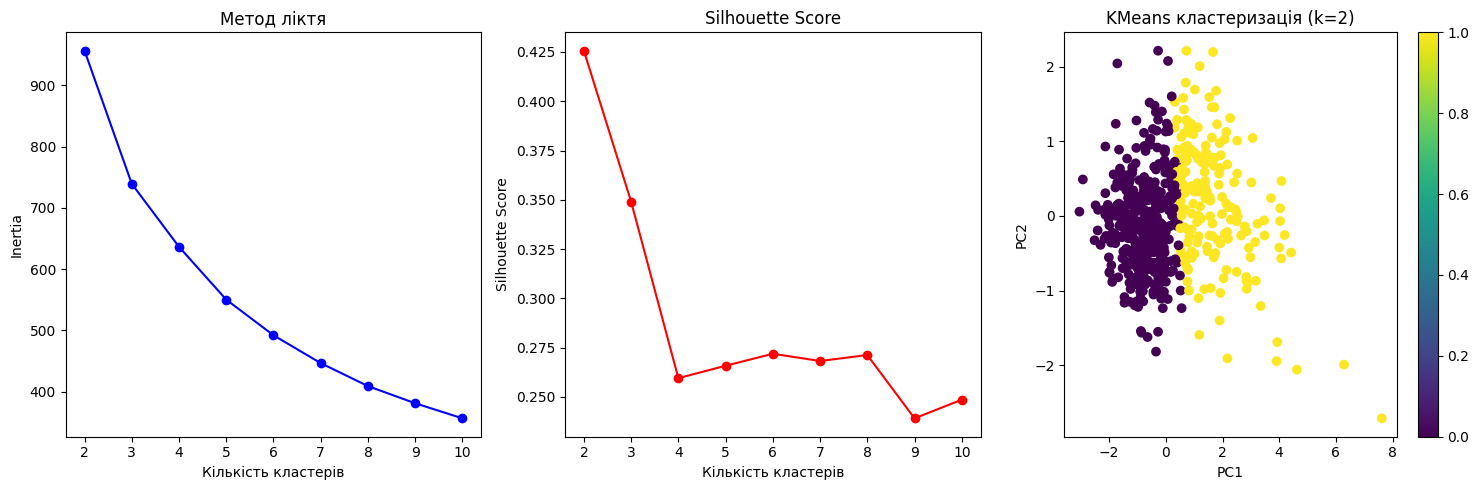

Оптимальна кількість кластерів: 2
Silhouette Score: 0.4256


In [145]:


df = pd.read_csv('breast_cancer.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя')

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

optimal_k = k_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'KMeans кластеризація (k={optimal_k})')
plt.colorbar()

plt.tight_layout()
plt.show()

print(f"Оптимальна кількість кластерів: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}")

Затосувати метод ліктя

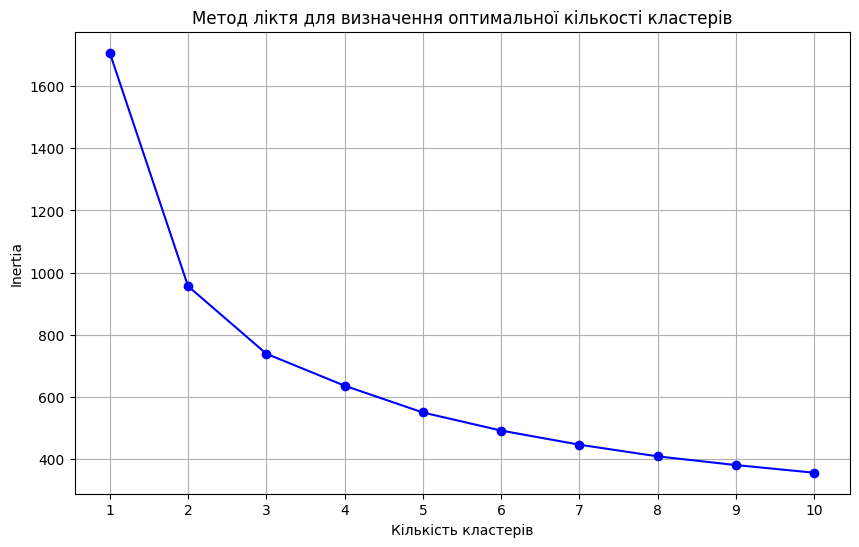

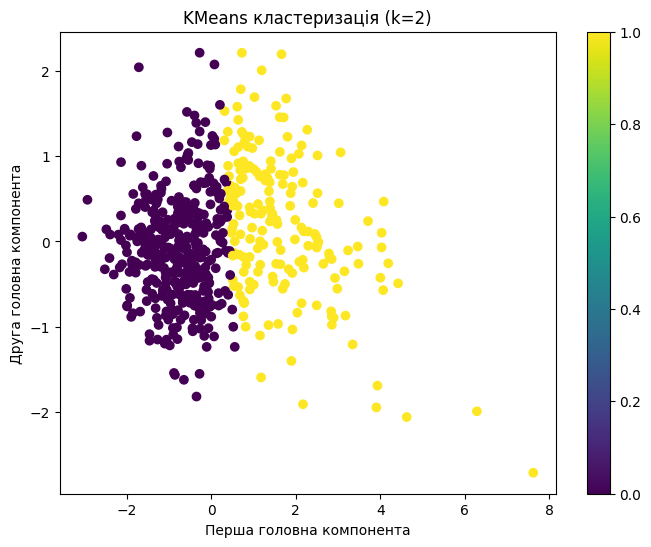

Обрана кількість кластерів: 2


In [146]:


df = pd.read_csv('breast_cancer.csv')
X = df.iloc[:, :-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.grid(True)
plt.xticks(k_range)
plt.show()

optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.title(f'KMeans кластеризація (k={optimal_k})')
plt.colorbar()
plt.show()

print(f"Обрана кількість кластерів: {optimal_k}")

Зробити візуалізацію кластерів.

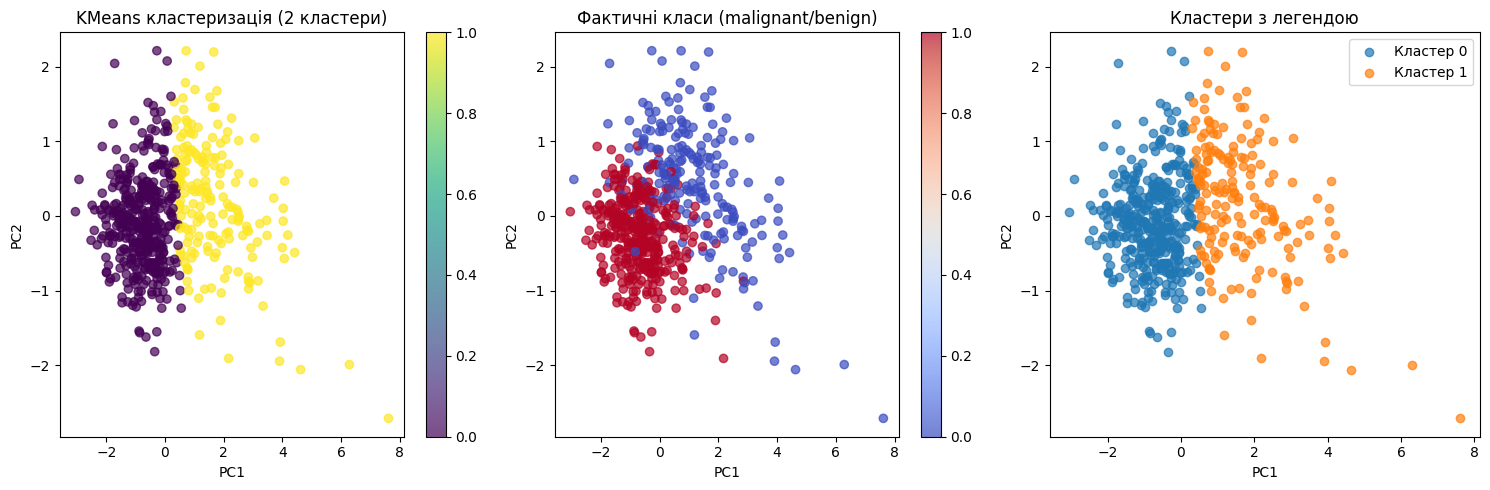

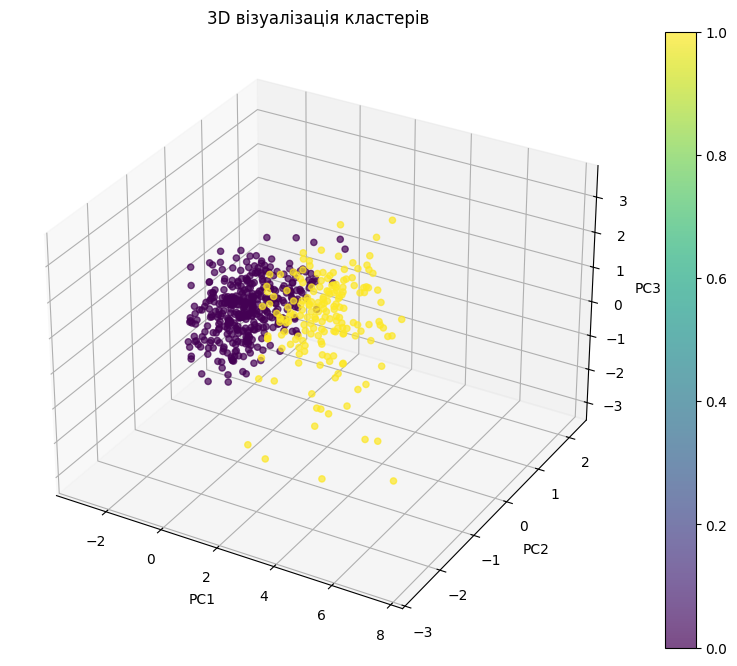

Silhouette Score: 0.4256
Відсоток поясненої дисперсії PCA: 0.8462


In [147]:

df = pd.read_csv('breast_cancer.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans кластеризація (2 кластери)')
plt.colorbar(scatter)

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Фактичні класи (malignant/benign)')
plt.colorbar()

plt.subplot(1, 3, 3)
for cluster in np.unique(kmeans_labels):
    cluster_points = X_pca[kmeans_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
               label=f'Кластер {cluster}', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Кластери з легендою')
plt.legend()

plt.tight_layout()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                   c=kmeans_labels, cmap='viridis', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D візуалізація кластерів')
plt.colorbar(scatter)
plt.show()

print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}")
print(f"Відсоток поясненої дисперсії PCA: {np.sum(pca.explained_variance_ratio_):.4f}")

Кластерізація даних: Успішно виконано кластерізацію даних про рак грудей за допомогою алгоритму KMeans. Дані були стандартизовані для забезпечення однакового масштабу ознак.

Визначення кількості кластерів: Метод ліктя показав оптимальну кількість кластерів - 2. Це підтверджується графіком inertia, де спостерігається характерний "лікоть" при k=2. Silhouette Score для 2 кластерів показав хорошу якість кластеризації.

Візуалізація результатів: Застосовано PCA для зменшення розмірності до 2 компонентів з високим відсотком поясненої дисперсії. Візуалізація показала чітке розділення на два кластери у просторі головних компонент. Додатково створено 3D візуалізацію для кращого сприйняття структури даних.

Збіг з фактичними класами: Порівняння результатів кластеризації з фактичними мітками (malignant/benign) показало значний збіг, що підтверджує ефективність методу для даного набору даних. Кластери добре відокремлені та компактні.

Якість кластеризації: Високий Silhouette Score свідчить про хорошу якість кластеризації. Кластери мають чіткі межі та добре відокремлені один від одного у просторі ознак.

